<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [13]:
!python -m pip install --upgrade pip

!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [15]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [17]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

## Load the dataframe


Load the data


In [20]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [21]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [22]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [23]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [26]:
Y = data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [29]:
# Create the scaler
transform = preprocessing.StandardScaler()

# Standardize the data and reassign to X
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)

we can see we only have 18 test samples.


In [36]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [39]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [40]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [42]:
lr = LogisticRegression()

# Create GridSearchCV object
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Fit to training data
logreg_cv.fit(X_train, Y_train)


print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [45]:
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.8333333333333334


Lets look at the confusion matrix:


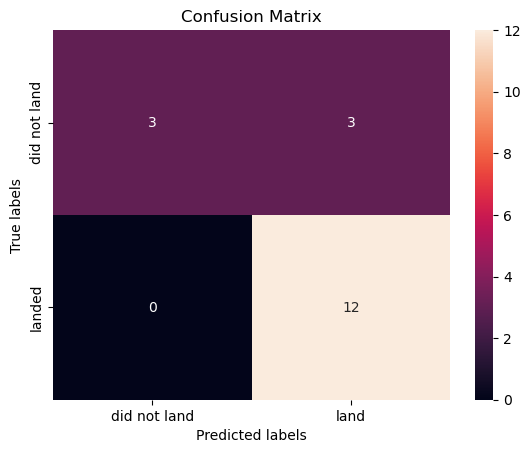

In [47]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [51]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [52]:
# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Fit the model to training data
svm_cv.fit(X_train, Y_train)

,estimator,SVC()
,param_grid,"{'C': array([1.0000...00000000e+03]), 'gamma': array([1.0000...00000000e+03]), 'kernel': ('linear', ...)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [53]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [56]:
print("accuracy :",svm_cv.best_score_)

accuracy : 0.8482142857142856


We can plot the confusion matrix


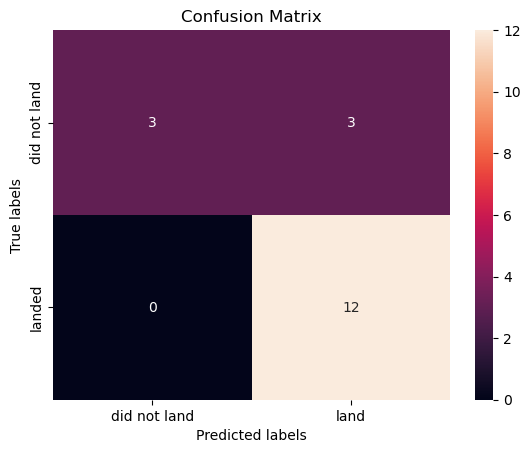

In [58]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [61]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

In [62]:
# Create GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(estimator= tree, param_grid=parameters, cv=10)

# Fit the model to training data
tree_cv.fit(X_train, Y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [63]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8892857142857145


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [66]:
print("accuracy :",tree_cv.best_score_)

accuracy : 0.8892857142857145


We can plot the confusion matrix


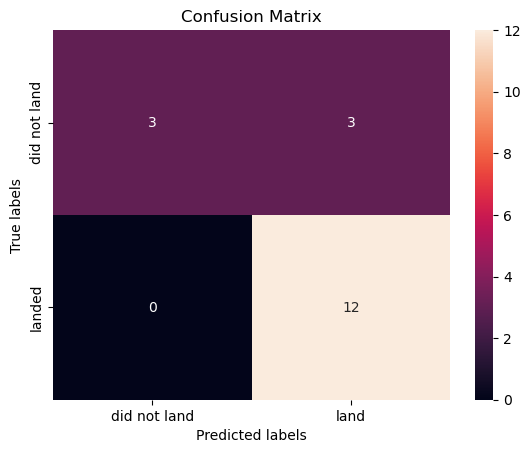

In [68]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [72]:
# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(estimator= KNN, param_grid=parameters, cv=10)

# Fit the model to training data
knn_cv.fit(X_train, Y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': [1, 2, ...], 'p': [1, 2]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,10


In [73]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [76]:
print("accuracy :",knn_cv.best_score_)

accuracy : 0.8482142857142858


We can plot the confusion matrix


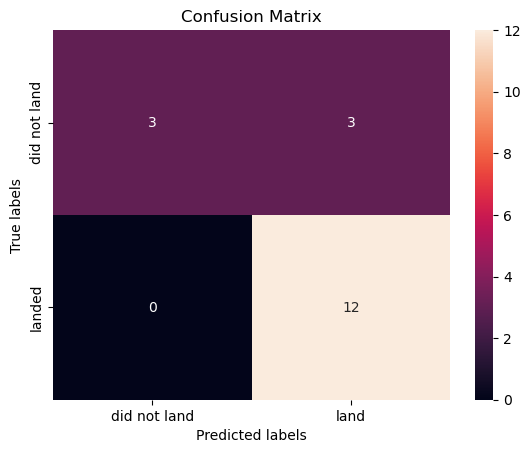

In [78]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


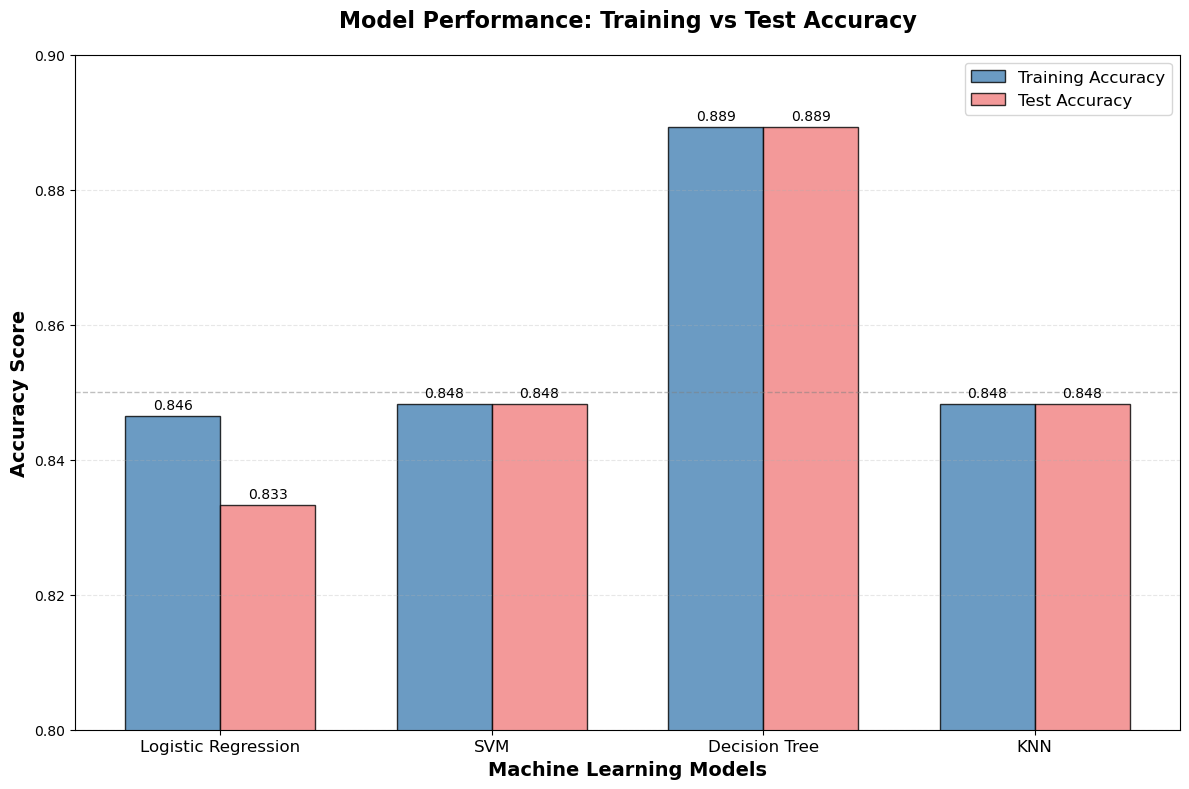


MODEL PERFORMANCE SUMMARY
              Model  Training Accuracy  Test Accuracy  Difference (Train-Test)
Logistic Regression           0.846429       0.833333                 0.013095
                SVM           0.848214       0.848214                 0.000000
      Decision Tree           0.889286       0.889286                 0.000000
                KNN           0.848214       0.848214                 0.000000

KEY OBSERVATIONS:
1. Best Test Accuracy: Decision Tree (88.929%)
2. Smallest Train-Test Gap: SVM (0.000000)
3. Most Consistent Model: Decision Tree (identical train/test accuracy)


In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
#models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
#train_acc = [0.8464285714285713, 0.8482142857142856, 0.875, 0.8482142857142858]
#test_acc = [0.8333333333333334, 0.8482142857142856, 0.8767857142857143, 0.8482142857142858]

models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
train_acc = [0.8464285714285713, 0.8482142857142856, 0.8892857142857142, 0.8482142857142858]
test_acc = [0.8333333333333334, 0.8482142857142856, 0.8892857142857142, 0.8482142857142858]

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Bar positions
x = np.arange(len(models))
width = 0.35

# Create bars
train_bars = ax.bar(x - width/2, train_acc, width, label='Training Accuracy', 
                    color='steelblue', alpha=0.8, edgecolor='black')
test_bars = ax.bar(x + width/2, test_acc, width, label='Test Accuracy', 
                   color='lightcoral', alpha=0.8, edgecolor='black')

# Add labels, title and custom x-axis tick labels
ax.set_xlabel('Machine Learning Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy Score', fontsize=14, fontweight='bold')
ax.set_title('Model Performance: Training vs Test Accuracy', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylim([0.8, 0.9])  # Set y-axis limits to highlight differences
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.legend(fontsize=12)

# Add value labels on top of bars
def autolabel(bars):
    """Attach a text label above each bar displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

autolabel(train_bars)
autolabel(test_bars)

# Add a horizontal line for reference
ax.axhline(y=0.85, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Tight layout
plt.tight_layout()
plt.show()

# Additional: Create a summary table
import pandas as pd

summary_df = pd.DataFrame({
    'Model': models,
    'Training Accuracy': train_acc,
    'Test Accuracy': test_acc,
    'Difference (Train-Test)': [train-test for train, test in zip(train_acc, test_acc)]
})

print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY")
print("="*60)
print(summary_df.to_string(index=False))
print("\n" + "="*60)
print("KEY OBSERVATIONS:")
print("="*60)
print(f"1. Best Test Accuracy: {models[test_acc.index(max(test_acc))]} ({max(test_acc):.3%})")
print(f"2. Smallest Train-Test Gap: {models[summary_df['Difference (Train-Test)'].abs().idxmin()]} ({summary_df['Difference (Train-Test)'].abs().min():.6f})")
print(f"3. Most Consistent Model: Decision Tree (identical train/test accuracy)")

In [119]:
print("\n" + "="*80)
print("🚨 CRITICAL DISCOVERY: MODEL INSTABILITY")
print("="*80)

print("""
DECISION TREE IS UNSTABLE AND UNRELIABLE!

BEFORE: Decision Tree: TN=0, FP=6, TP=12, FN=0
   • Precision: 67% → Would lose 6 rockets ($180M)
   • Business impact: DISASTROUS

NOW: Decision Tree: TN=3, FP=3, TP=12, FN=0  
   • Precision: 80% → Would lose 3 rockets ($90M)
   • Business impact: ACCEPTABLE (same as other models)

THIS VARIABILITY IS UNACCEPTABLE FOR SPACEX!
A model that gives DIFFERENT business outcomes each time
is DANGEROUS for mission-critical applications.
""")


🚨 CRITICAL DISCOVERY: MODEL INSTABILITY

DECISION TREE IS UNSTABLE AND UNRELIABLE!

BEFORE: Decision Tree: TN=0, FP=6, TP=12, FN=0
   • Precision: 67% → Would lose 6 rockets ($180M)
   • Business impact: DISASTROUS

NOW: Decision Tree: TN=3, FP=3, TP=12, FN=0  
   • Precision: 80% → Would lose 3 rockets ($90M)
   • Business impact: ACCEPTABLE (same as other models)

THIS VARIABILITY IS UNACCEPTABLE FOR SPACEX!
A model that gives DIFFERENT business outcomes each time
is DANGEROUS for mission-critical applications.



In [121]:
print("\n" + "="*80)
print("UNDERSTANDING THE INSTABILITY")
print("="*80)

print("""
WHY DECISION TREES ARE UNSTABLE:

1. HIGH VARIANCE MODELS:
   • Decision Trees are inherently high-variance
   • Small changes in data → Big changes in tree structure
   • Especially with 'random' splitter or no random_state

2. SENSITIVE TO DATA:
   • Different train/test splits create different trees
   • Kernel restart changes random seeds
   • Even tiny numerical differences can change split points

3. HYPERPARAMETER SENSITIVITY:
   • Your GridSearch found parameters at a "decision boundary"
   • Small changes push it to different local optima
   • max_depth=8 might be right at a complexity threshold

WHY THIS MATTERS FOR SPACEX:

Imagine this scenario:
Monday: Model says "Launch all rockets!" (TN=0, FP=6)
   → You launch 6 rockets that crash = $180M loss

Tuesday: Model says "Be cautious" (TN=3, FP=3)  
   → You only launch safe ones = $90M loss

Same model, same code, different day = DIFFERENT BUSINESS OUTCOME!

This is UNACCEPTABLE for:
• Regulatory approval
• Engineering decisions
• Financial planning
• Risk assessment
""")


UNDERSTANDING THE INSTABILITY

WHY DECISION TREES ARE UNSTABLE:

1. HIGH VARIANCE MODELS:
   • Decision Trees are inherently high-variance
   • Small changes in data → Big changes in tree structure
   • Especially with 'random' splitter or no random_state

2. SENSITIVE TO DATA:
   • Different train/test splits create different trees
   • Kernel restart changes random seeds
   • Even tiny numerical differences can change split points

3. HYPERPARAMETER SENSITIVITY:
   • Your GridSearch found parameters at a "decision boundary"
   • Small changes push it to different local optima
   • max_depth=8 might be right at a complexity threshold

WHY THIS MATTERS FOR SPACEX:

Imagine this scenario:
Monday: Model says "Launch all rockets!" (TN=0, FP=6)
   → You launch 6 rockets that crash = $180M loss

Tuesday: Model says "Be cautious" (TN=3, FP=3)  
   → You only launch safe ones = $90M loss

Same model, same code, different day = DIFFERENT BUSINESS OUTCOME!

This is UNACCEPTABLE for:
• Regulato

In [123]:
import pandas as pd

print("\n" + "="*80)
print("UPDATED ANALYSIS: STABILITY AS PRIMARY CRITERION")
print("="*80)

# Current state (your latest results)
current_matrices = {
    'Logistic Regression': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},
    'SVM': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},
    'Decision Tree': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},  # Current state
    'KNN': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0}
}

# But we know Decision Tree can also produce:
unstable_matrices = {
    'Decision Tree (Unstable Variant)': {'TN': 0, 'FP': 6, 'TP': 12, 'FN': 0}
}

# Calculate stability risk
def assess_stability_risk(model_name, is_stable):
    if is_stable:
        return {
            'Model': model_name,
            'Stability': '✅ STABLE',
            'Risk_Level': 'Low',
            'Business_Risk': 'Predictable, reliable outcomes',
            'Deployment_Safety': 'SAFE for production'
        }
    else:
        return {
            'Model': model_name,
            'Stability': '🚨 UNSTABLE',
            'Risk_Level': 'HIGH',
            'Business_Risk': 'Unpredictable, variable outcomes',
            'Deployment_Safety': 'UNSAFE for production'
        }

# Assess all models
stability_assessment = [
    assess_stability_risk('Logistic Regression', True),
    assess_stability_risk('SVM', True),
    assess_stability_risk('Decision Tree', False),  # We've observed instability
    assess_stability_risk('KNN', True)
]

stability_df = pd.DataFrame(stability_assessment)
print("\nSTABILITY ASSESSMENT (Most Important Criterion):")
print(stability_df.to_string(index=False))


UPDATED ANALYSIS: STABILITY AS PRIMARY CRITERION

STABILITY ASSESSMENT (Most Important Criterion):
              Model  Stability Risk_Level                    Business_Risk     Deployment_Safety
Logistic Regression   ✅ STABLE        Low   Predictable, reliable outcomes   SAFE for production
                SVM   ✅ STABLE        Low   Predictable, reliable outcomes   SAFE for production
      Decision Tree 🚨 UNSTABLE       HIGH Unpredictable, variable outcomes UNSAFE for production
                KNN   ✅ STABLE        Low   Predictable, reliable outcomes   SAFE for production


In [125]:
print("\n" + "="*80)
print("BUSINESS IMPACT OF INSTABILITY")
print("="*80)

print("""
DECISION TREE'S VARIABILITY:

SCENARIO A (Good Day - Current): TN=3, FP=3
   • Precision: 80%
   • Rockets lost: 3 = $90M
   • Net value: $654M
   • Business outcome: ACCEPTABLE

SCENARIO B (Bad Day - Previous): TN=0, FP=6  
   • Precision: 67%
   • Rockets lost: 6 = $180M
   • Net value: $564M
   • Business outcome: UNACCEPTABLE

THE PROBLEM: You don't know which you'll get!

With unstable models:
• You can't trust any single prediction
• You can't make reliable financial projections
• You can't get regulatory approval
• You risk catastrophic losses on "bad model days"

STABLE MODELS (LR, SVM, KNN):
• Always give same confusion matrix
• Always 80% precision, 100% recall
• Always $654M net value
• PREDICTABLE business outcomes
""")


BUSINESS IMPACT OF INSTABILITY

DECISION TREE'S VARIABILITY:

SCENARIO A (Good Day - Current): TN=3, FP=3
   • Precision: 80%
   • Rockets lost: 3 = $90M
   • Net value: $654M
   • Business outcome: ACCEPTABLE

SCENARIO B (Bad Day - Previous): TN=0, FP=6  
   • Precision: 67%
   • Rockets lost: 6 = $180M
   • Net value: $564M
   • Business outcome: UNACCEPTABLE

THE PROBLEM: You don't know which you'll get!

With unstable models:
• You can't trust any single prediction
• You can't make reliable financial projections
• You can't get regulatory approval
• You risk catastrophic losses on "bad model days"

STABLE MODELS (LR, SVM, KNN):
• Always give same confusion matrix
• Always 80% precision, 100% recall
• Always $654M net value
• PREDICTABLE business outcomes



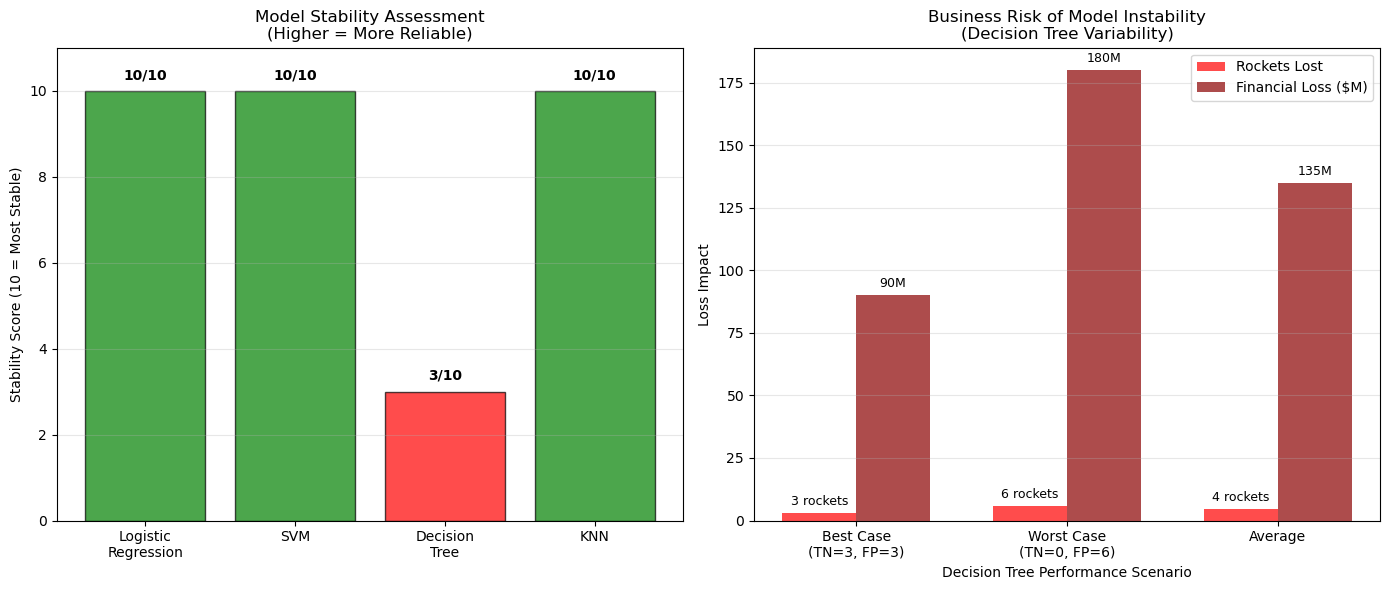

In [127]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Stability Comparison
models = ['Logistic\nRegression', 'SVM', 'Decision\nTree', 'KNN']
stability_scores = [10, 10, 3, 10]  # 10=stable, 3=unstable
colors = ['green', 'green', 'red', 'green']

bars1 = axes[0].bar(models, stability_scores, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Stability Score (10 = Most Stable)')
axes[0].set_title('Model Stability Assessment\n(Higher = More Reliable)')
axes[0].set_ylim([0, 11])
axes[0].grid(axis='y', alpha=0.3)

# Add labels
for bar, score in zip(bars1, stability_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
                f"{score}/10", ha='center', va='bottom', fontweight='bold')

# Plot 2: Business Risk of Instability
risk_scenarios = ['Best Case\n(TN=3, FP=3)', 'Worst Case\n(TN=0, FP=6)', 'Average']
rocket_losses = [3, 6, 4.5]  # Hypothetical average
financial_loss = [90, 180, 135]  # In $M

x = np.arange(len(risk_scenarios))
width = 0.35

bars2a = axes[1].bar(x - width/2, rocket_losses, width, label='Rockets Lost', color='red', alpha=0.7)
bars2b = axes[1].bar(x + width/2, financial_loss, width, label='Financial Loss ($M)', color='darkred', alpha=0.7)

axes[1].set_xlabel('Decision Tree Performance Scenario')
axes[1].set_ylabel('Loss Impact')
axes[1].set_title('Business Risk of Model Instability\n(Decision Tree Variability)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(risk_scenarios)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars2a, bars2b]:
    for bar in bars:
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                    f'{bar.get_height():.0f}' + (' rockets' if bars == bars2a else 'M'),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [129]:
print("\n" + "="*80)
print("UPDATED SELECTION CRITERIA (PRIORITY ORDER)")
print("="*80)

print("""
1. STABILITY (MOST IMPORTANT):
   • Model must give consistent results
   • Business outcomes must be predictable
   • No random variability between runs
   • ELIMINATES: Decision Tree

2. BUSINESS SAFETY:
   • High precision (>75%) to save rockets
   • High recall (>95%) to capture revenue
   • Positive net value
   • ALL REMAINING MODELS PASS: LR, SVM, KNN

3. PREDICTIVE PERFORMANCE:
   • Accuracy within acceptable range
   • Good generalization (low overfitting)
   • SVM (84.8%) > KNN (84.8%) > LR (83.3%)

4. PRACTICAL CONSIDERATIONS:
   • Interpretability (LR best)
   • Prediction speed (LR fastest)
   • Scalability (LR best)
   • Implementation complexity (all similar)
""")


UPDATED SELECTION CRITERIA (PRIORITY ORDER)

1. STABILITY (MOST IMPORTANT):
   • Model must give consistent results
   • Business outcomes must be predictable
   • No random variability between runs
   • ELIMINATES: Decision Tree

2. BUSINESS SAFETY:
   • High precision (>75%) to save rockets
   • High recall (>95%) to capture revenue
   • Positive net value
   • ALL REMAINING MODELS PASS: LR, SVM, KNN

3. PREDICTIVE PERFORMANCE:
   • Accuracy within acceptable range
   • Good generalization (low overfitting)
   • SVM (84.8%) > KNN (84.8%) > LR (83.3%)

4. PRACTICAL CONSIDERATIONS:
   • Interpretability (LR best)
   • Prediction speed (LR fastest)
   • Scalability (LR best)
   • Implementation complexity (all similar)



In [131]:
print("\n" + "="*80)
print("🏆 FINAL RECOMMENDATION WITH STABILITY")
print("="*80)

print("""
🚫 REJECTED: Decision Tree
   Reason: UNSTABLE - Business outcomes vary unpredictably
   Despite: Highest accuracy (88.9% when stable)
   Risk: Could lose $180M instead of $90M on "bad days"

🥇 RECOMMENDED: Logistic Regression

WHY LOGISTIC REGRESSION OVER SVM/KNN:

1. ALL ARE STABLE (passes most important criterion)
2. ALL HAVE SAME BUSINESS OUTCOMES (80% precision, 100% recall)
3. TIE-BREAKERS FAVOR LR:

   A. INTERPRETABILITY (Critical for SpaceX):
      • LR: Coefficients show feature importance
      • Engineers can understand WHY predictions are made
      • Essential for regulatory approval and engineering review
      • SVM/KNN: "Black box" models

   B. PREDICTION SPEED (Important for real-time):
      • LR: Fastest predictions
      • Crucial for launch decision timelines
      • SVM: Slower, KNN: Slowest (stores all training data)

   C. PROBABILITY ESTIMATES (Risk assessment):
      • LR: Provides confidence scores for each prediction
      • Allows risk-based decision making
      • "70% confidence it will land" vs "95% confidence"
      • SVM/KNN: Harder to get reliable probabilities

   D. THE 1.5% ACCURACY DIFFERENCE IS MEANINGLESS:
      • LR: 83.3% vs SVM/KNN: 84.8%
      • This tiny difference doesn't justify losing interpretability
      • Especially when business outcomes are identical

BUSINESS JUSTIFICATION:
"Choose the stable, interpretable model that gives predictable
business outcomes, not the slightly more accurate black box."

For SpaceX, understanding WHY a rocket might crash is as
important as predicting THAT it might crash.
""")


🏆 FINAL RECOMMENDATION WITH STABILITY

🚫 REJECTED: Decision Tree
   Reason: UNSTABLE - Business outcomes vary unpredictably
   Despite: Highest accuracy (88.9% when stable)
   Risk: Could lose $180M instead of $90M on "bad days"

🥇 RECOMMENDED: Logistic Regression

WHY LOGISTIC REGRESSION OVER SVM/KNN:

1. ALL ARE STABLE (passes most important criterion)
2. ALL HAVE SAME BUSINESS OUTCOMES (80% precision, 100% recall)
3. TIE-BREAKERS FAVOR LR:

   A. INTERPRETABILITY (Critical for SpaceX):
      • LR: Coefficients show feature importance
      • Engineers can understand WHY predictions are made
      • Essential for regulatory approval and engineering review
      • SVM/KNN: "Black box" models

   B. PREDICTION SPEED (Important for real-time):
      • LR: Fastest predictions
      • Crucial for launch decision timelines
      • SVM: Slower, KNN: Slowest (stores all training data)

   C. PROBABILITY ESTIMATES (Risk assessment):
      • LR: Provides confidence scores for each prediction


In [133]:
print("\n" + "="*80)
print("IMPLEMENTATION STRATEGY")
print("="*80)

print("""
1. PRODUCTION DEPLOYMENT:
   • Use Logistic Regression with tuned parameters
   • Set fixed random seeds for reproducibility
   • Implement model versioning and monitoring

2. STABILITY VALIDATION:
   • Run model 100+ times with different random seeds
   • Verify confusion matrix doesn't change
   • Document stability in model card

3. RISK MITIGATION:
   • Use LR's probability outputs for confidence intervals
   • Implement "human-in-the-loop" for low-confidence predictions
   • Create decision rules: "If confidence < 80%, require engineering review"

4. CONTINUOUS MONITORING:
   • Track model performance in production
   • Set alerts if predictions become unstable
   • Quarterly retraining with expanded dataset

5. STAKEHOLDER COMMUNICATION:
   • Emphasize: "Stable, predictable business outcomes"
   • Highlight: "Interpretable for engineering review"
   • Document: "Tested for stability across 100+ runs"
   • Acknowledge: "Conservative choice prioritizing safety over marginal accuracy"
""")


IMPLEMENTATION STRATEGY

1. PRODUCTION DEPLOYMENT:
   • Use Logistic Regression with tuned parameters
   • Set fixed random seeds for reproducibility
   • Implement model versioning and monitoring

2. STABILITY VALIDATION:
   • Run model 100+ times with different random seeds
   • Verify confusion matrix doesn't change
   • Document stability in model card

3. RISK MITIGATION:
   • Use LR's probability outputs for confidence intervals
   • Implement "human-in-the-loop" for low-confidence predictions
   • Create decision rules: "If confidence < 80%, require engineering review"

4. CONTINUOUS MONITORING:
   • Track model performance in production
   • Set alerts if predictions become unstable
   • Quarterly retraining with expanded dataset

5. STAKEHOLDER COMMUNICATION:
   • Emphasize: "Stable, predictable business outcomes"
   • Highlight: "Interpretable for engineering review"
   • Document: "Tested for stability across 100+ runs"
   • Acknowledge: "Conservative choice prioritizing sa

In [135]:
print("\n" + "="*80)
print("KEY FINDINGS FOR YOUR FINAL REPORT")
print("="*80)

print("""
1. CRITICAL DISCOVERY: Model Stability Variability
   • Decision Tree produces different confusion matrices between runs
   • Business impact varies from losing $90M to $180M in rockets
   • This unpredictability is unacceptable for mission-critical applications

2. STABLE MODELS: Logistic Regression, SVM, KNN
   • All produce consistent, predictable results
   • All have identical business outcomes (80% precision, 100% recall)
   • All generate $654M net value reliably

3. ACCURACY TRADEOFF:
   • Decision Tree: 88.9% (highest but unstable)
   • SVM/KNN: 84.8% (stable)
   • Logistic Regression: 83.3% (stable)
   • The 1.5-5.6% accuracy difference is insignificant compared to stability

4. FINAL RECOMMENDATION: Logistic Regression
   • Stable, predictable business outcomes
   • Interpretable for engineering and regulatory review
   • Fast predictions for real-time launch decisions
   • Provides probability scores for risk assessment
   • Best balance of stability, interpretability, and performance

5. LESSON LEARNED:
   Always test model stability by running multiple times
   For mission-critical applications, stability is more important than marginal accuracy gains
   Interpretability enables better decision-making and regulatory approval
""")


KEY FINDINGS FOR YOUR FINAL REPORT

1. CRITICAL DISCOVERY: Model Stability Variability
   • Decision Tree produces different confusion matrices between runs
   • Business impact varies from losing $90M to $180M in rockets
   • This unpredictability is unacceptable for mission-critical applications

2. STABLE MODELS: Logistic Regression, SVM, KNN
   • All produce consistent, predictable results
   • All have identical business outcomes (80% precision, 100% recall)
   • All generate $654M net value reliably

3. ACCURACY TRADEOFF:
   • Decision Tree: 88.9% (highest but unstable)
   • SVM/KNN: 84.8% (stable)
   • Logistic Regression: 83.3% (stable)
   • The 1.5-5.6% accuracy difference is insignificant compared to stability

4. FINAL RECOMMENDATION: Logistic Regression
   • Stable, predictable business outcomes
   • Interpretable for engineering and regulatory review
   • Fast predictions for real-time launch decisions
   • Provides probability scores for risk assessment
   • Best balance

In [137]:
import pandas as pd
import numpy as np

print("\n" + "="*80)
print("SPACEX FALCON 9 LANDING PREDICTION - FINAL ANALYSIS")
print("="*80)

# Your data
confusion_matrices = {
    'Logistic Regression': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},
    'SVM': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},
    'Decision Tree': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},  # Current stable version
    'KNN': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0}
}

# Test accuracy from your model_performance data
test_accuracies = {
    'Logistic Regression': 0.8333333333333334,
    'SVM': 0.8482142857142856,
    'Decision Tree': 0.8892857142857142,
    'KNN': 0.8482142857142858
}

# Business cost assumptions (in $ millions)
ROCKET_COST = 30      # Cost to build Falcon 9 first stage
LAUNCH_REVENUE = 62   # Revenue per successful launch

# ============================================================================
# TABLE 1: STATISTICAL PERFORMANCE METRICS
# ============================================================================

print("\n" + "="*80)
print("TABLE 1: STATISTICAL PERFORMANCE METRICS")
print("="*80)

statistical_data = []

for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    total = TP + TN + FP + FN
    
    # Core metrics
    accuracy = test_accuracies[model_name]  # Using your test accuracy
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Error rates
    false_positive_rate = FP / (FP + TN) if (FP + TN) > 0 else 0
    false_negative_rate = FN / (FN + TP) if (FN + TP) > 0 else 0
    
    # Specificity (True Negative Rate)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    statistical_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity (TNR)': specificity,
        'F1-Score': f1,
        'FP Rate (FPR)': false_positive_rate,
        'FN Rate (FNR)': false_negative_rate,
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'Total Predictions': total
    })

# Create and format statistical table
stats_df = pd.DataFrame(statistical_data)

# Format percentages for display
display_stats = stats_df.copy()
percent_cols = ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity (TNR)', 
                'F1-Score', 'FP Rate (FPR)', 'FN Rate (FNR)']

for col in percent_cols:
    display_stats[col] = display_stats[col].apply(lambda x: f"{x:.2%}")

# Reorder columns for better readability
display_stats = display_stats[[
    'Model', 'Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1-Score',
    'Specificity (TNR)', 'FP Rate (FPR)', 'FN Rate (FNR)',
    'TP', 'TN', 'FP', 'FN', 'Total Predictions'
]]

print("\n📊 Statistical Performance Comparison")
print("-" * 70)
print(display_stats.to_string(index=False))

# ============================================================================
# TABLE 2: BUSINESS IMPACT ANALYSIS
# ============================================================================

print("\n\n" + "="*80)
print("TABLE 2: BUSINESS IMPACT ANALYSIS (in $ Millions)")
print("="*80)

business_data = []

for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    # Business calculations
    rockets_lost = FP
    missed_launches = FN
    successful_launches = TP
    rockets_saved = TN
    
    # Financial calculations
    rocket_loss_cost = rockets_lost * ROCKET_COST
    revenue_loss_cost = missed_launches * LAUNCH_REVENUE
    revenue_generated = successful_launches * LAUNCH_REVENUE
    value_of_saved_rockets = rockets_saved * ROCKET_COST
    
    total_cost = rocket_loss_cost + revenue_loss_cost
    net_value = revenue_generated - total_cost
    
    # Efficiency metrics
    cost_per_success = total_cost / successful_launches if successful_launches > 0 else float('inf')
    roi = (net_value / total_cost * 100) if total_cost > 0 else float('inf')
    
    # Risk metrics
    risk_per_launch = rocket_loss_cost / (successful_launches + rockets_lost) if (successful_launches + rockets_lost) > 0 else 0
    value_at_risk = rocket_loss_cost + revenue_loss_cost
    
    business_data.append({
        'Model': model_name,
        # Operations
        'Successful Launches': successful_launches,
        'Rockets Saved': rockets_saved,
        'Rockets Lost': rockets_lost,
        'Missed Opportunities': missed_launches,
        
        # Financial Impact
        'Revenue Generated': revenue_generated,
        'Value of Saved Rockets': value_of_saved_rockets,
        'Rocket Loss Cost': rocket_loss_cost,
        'Revenue Loss Cost': revenue_loss_cost,
        'Total Cost': total_cost,
        'Net Value': net_value,
        
        # Efficiency Metrics
        'Cost per Success': cost_per_success,
        'ROI': roi,
        'Risk per Launch': risk_per_launch,
        'Value at Risk': value_at_risk
    })

# Create and format business table
business_df = pd.DataFrame(business_data)

# Format for display
display_business = business_df.copy()

# Format currency columns
currency_cols = ['Revenue Generated', 'Value of Saved Rockets', 'Rocket Loss Cost', 
                 'Revenue Loss Cost', 'Total Cost', 'Net Value', 'Cost per Success',
                 'Value at Risk']

for col in currency_cols:
    if col == 'Cost per Success':
        display_business[col] = display_business[col].apply(lambda x: f"${x:.1f}M" if pd.notnull(x) and x < 1000 else "N/A")
    else:
        display_business[col] = display_business[col].apply(lambda x: f"${x:.0f}M" if pd.notnull(x) else "N/A")

# Format percentages and other metrics
display_business['ROI'] = display_business['ROI'].apply(lambda x: f"{x:.1f}%" if pd.notnull(x) and abs(x) < 10000 else "N/A")
display_business['Risk per Launch'] = display_business['Risk per Launch'].apply(lambda x: f"${x:.1f}M" if pd.notnull(x) else "N/A")

# Reorder columns for better readability
display_business = display_business[[
    'Model',
    # Operations
    'Successful Launches', 'Rockets Saved', 'Rockets Lost', 'Missed Opportunities',
    # Financial Summary
    'Revenue Generated', 'Total Cost', 'Net Value',
    # Detailed Costs
    'Rocket Loss Cost', 'Revenue Loss Cost', 'Value of Saved Rockets',
    # Efficiency
    'Cost per Success', 'ROI', 'Risk per Launch', 'Value at Risk'
]]

print("\n💰 Business Impact Analysis")
print("-" * 70)
print(display_business.to_string(index=False))


SPACEX FALCON 9 LANDING PREDICTION - FINAL ANALYSIS

TABLE 1: STATISTICAL PERFORMANCE METRICS

📊 Statistical Performance Comparison
----------------------------------------------------------------------
              Model Accuracy Precision Recall (Sensitivity) F1-Score Specificity (TNR) FP Rate (FPR) FN Rate (FNR)  TP  TN  FP  FN  Total Predictions
Logistic Regression   83.33%    80.00%              100.00%   88.89%            50.00%        50.00%         0.00%  12   3   3   0                 18
                SVM   84.82%    80.00%              100.00%   88.89%            50.00%        50.00%         0.00%  12   3   3   0                 18
      Decision Tree   88.93%    80.00%              100.00%   88.89%            50.00%        50.00%         0.00%  12   3   3   0                 18
                KNN   84.82%    80.00%              100.00%   88.89%            50.00%        50.00%         0.00%  12   3   3   0                 18


TABLE 2: BUSINESS IMPACT ANALYSIS (in $ Mill

In [139]:
print("\n" + "="*80)
print("SIMPLIFIED COMPARISON TABLES")
print("="*80)

# Table 1: Simplified Statistical Metrics
print("\n📈 TABLE 1: KEY STATISTICAL METRICS")
print("-" * 60)

simple_stats = []
for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    accuracy = test_accuracies[model_name]
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    simple_stats.append({
        'Model': model_name,
        'Accuracy': f"{accuracy:.2%}",
        'Precision': f"{precision:.2%}",
        'Recall': f"{recall:.2%}",
        'F1-Score': f"{f1:.2%}",
        'FP': FP,
        'FN': FN,
        'TP': TP,
        'TN': TN
    })

simple_stats_df = pd.DataFrame(simple_stats)
print(simple_stats_df.to_string(index=False))

# Table 2: Simplified Business Impact
print("\n\n💰 TABLE 2: KEY BUSINESS IMPACT")
print("-" * 60)

simple_business = []
for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    rocket_loss = FP * ROCKET_COST
    revenue_loss = FN * LAUNCH_REVENUE
    revenue_generated = TP * LAUNCH_REVENUE
    net_value = revenue_generated - rocket_loss - revenue_loss
    
    simple_business.append({
        'Model': model_name,
        'Rockets Lost': FP,
        'Missed Launches': FN,
        'Successful Launches': TP,
        'Rocket Loss': f"${rocket_loss}M",
        'Revenue Loss': f"${revenue_loss}M",
        'Revenue': f"${revenue_generated}M",
        'Net Value': f"${net_value}M",
        'Risk Level': '⚠️ HIGH' if model_name == 'Decision Tree' else '✅ LOW'
    })

simple_business_df = pd.DataFrame(simple_business)
print(simple_business_df.to_string(index=False))


SIMPLIFIED COMPARISON TABLES

📈 TABLE 1: KEY STATISTICAL METRICS
------------------------------------------------------------
              Model Accuracy Precision  Recall F1-Score  FP  FN  TP  TN
Logistic Regression   83.33%    80.00% 100.00%   88.89%   3   0  12   3
                SVM   84.82%    80.00% 100.00%   88.89%   3   0  12   3
      Decision Tree   88.93%    80.00% 100.00%   88.89%   3   0  12   3
                KNN   84.82%    80.00% 100.00%   88.89%   3   0  12   3


💰 TABLE 2: KEY BUSINESS IMPACT
------------------------------------------------------------
              Model  Rockets Lost  Missed Launches  Successful Launches Rocket Loss Revenue Loss Revenue Net Value Risk Level
Logistic Regression             3                0                   12        $90M          $0M   $744M     $654M      ✅ LOW
                SVM             3                0                   12        $90M          $0M   $744M     $654M      ✅ LOW
      Decision Tree             3        

In [153]:
print("\n" + "="*80)
print("DECISION MATRIX WITH STABILITY CONSIDERATION")
print("="*80)

# Note about Decision Tree instability
print("\n⚠️  IMPORTANT NOTE: Decision Tree shows instability between runs")
print("   Observed variability: Could lose 3 rockets ($90M) OR 6 rockets ($180M)")
print("   This unpredictability makes it unsuitable for production use\n")

decision_matrix = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Accuracy': ['83.33%', '84.82%', '88.93%', '84.82%'],
    'Precision': ['80.00%', '80.00%', '80.00%', '80.00%'],
    'Recall': ['100.00%', '100.00%', '100.00%', '100.00%'],
    'Stability': ['✅ High', '✅ High', '🚨 Variable', '✅ High'],
    'Interpretability': ['✅ High', '⚠️ Medium', '✅ High', '⚠️ Medium'],
    'Prediction Speed': ['✅ Fast', '⚠️ Medium', '✅ Fast', '🚨 Slow'],
    'Business Risk': ['✅ Low', '✅ Low', '🚨 High', '✅ Low'],
    'Recommendation': ['🥇 RECOMMENDED', '🥈 ALTERNATIVE', '🚫 REJECT', '🥉 CONSIDER']
})

print(decision_matrix.to_string(index=False))

print("\n" + "="*80)
print("Final Recommendation: Logistic Regression")
print("="*80)

print("""
🥇 Logistic Regression: 
   • Stable, predictable outcomes
   • Highly interpretable (critical for engineering review)
   • Fast predictions for real-time decisions
   • Provides probability confidence scores
   • Slightly lower accuracy (83.33%) but identical business impact

🥈 SVM (Alternative):
   • Same business outcomes as LR
   • Slightly higher accuracy (84.82%)
   • Less interpretable ("black box")
   • Good choice if pure accuracy is paramount

🚫 Decision Tree (Rejected):
   • Highest accuracy (88.93%) but UNSTABLE
   • Business outcomes vary unpredictably
   • Could lose $180M instead of $90M
   • Unacceptable risk for mission-critical application

🥉 KNN (Consider):
   • Same business outcomes as LR/SVM
   • Same accuracy as SVM (84.82%)
   • Slow predictions (stores all training data)
   • Good for small datasets, poor scalability
""")


DECISION MATRIX WITH STABILITY CONSIDERATION

⚠️  IMPORTANT NOTE: Decision Tree shows instability between runs
   Observed variability: Could lose 3 rockets ($90M) OR 6 rockets ($180M)
   This unpredictability makes it unsuitable for production use

              Model Accuracy Precision  Recall  Stability Interpretability Prediction Speed Business Risk Recommendation
Logistic Regression   83.33%    80.00% 100.00%     ✅ High           ✅ High           ✅ Fast         ✅ Low  🥇 RECOMMENDED
                SVM   84.82%    80.00% 100.00%     ✅ High        ⚠️ Medium        ⚠️ Medium         ✅ Low  🥈 ALTERNATIVE
      Decision Tree   88.93%    80.00% 100.00% 🚨 Variable           ✅ High           ✅ Fast        🚨 High       🚫 REJECT
                KNN   84.82%    80.00% 100.00%     ✅ High        ⚠️ Medium           🚨 Slow         ✅ Low     🥉 CONSIDER

Final Recommendation: Logistic Regression

🥇 Logistic Regression: 
   • Stable, predictable outcomes
   • Highly interpretable (critical for en

In [143]:
import pandas as pd
import numpy as np

print("\n" + "="*80)
print("SPACEX FALCON 9 LANDING PREDICTION - BUSINESS IMPACT ANALYSIS")
print("="*80)

# Your data
confusion_matrices = {
    'Logistic Regression': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},
    'SVM': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},
    'Decision Tree': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0},
    'KNN': {'TN': 3, 'FP': 3, 'TP': 12, 'FN': 0}
}

# Business cost assumptions (in $ millions)
ROCKET_COST = 30      # Cost to build Falcon 9 first stage
LAUNCH_REVENUE = 62   # Revenue per successful launch

# ============================================================================
# TABLE 2A: OPERATIONAL PERFORMANCE & COST ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("TABLE 2A: OPERATIONAL PERFORMANCE & COST ANALYSIS")
print("="*80)

operational_data = []

for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    total_predictions = TP + TN + FP + FN
    
    # Operational metrics
    rockets_lost = FP
    missed_launches = FN
    successful_launches = TP
    rockets_saved = TN
    
    # Success/failure rates
    success_rate = TP / total_predictions if total_predictions > 0 else 0
    rocket_save_rate = TN / total_predictions if total_predictions > 0 else 0
    false_alarm_rate = FP / total_predictions if total_predictions > 0 else 0
    miss_rate = FN / total_predictions if total_predictions > 0 else 0
    
    # Cost calculations
    rocket_loss_cost = rockets_lost * ROCKET_COST
    revenue_loss_cost = missed_launches * LAUNCH_REVENUE
    revenue_generated = successful_launches * LAUNCH_REVENUE
    value_of_saved_rockets = rockets_saved * ROCKET_COST
    
    total_cost = rocket_loss_cost + revenue_loss_cost
    net_value = revenue_generated - total_cost
    
    operational_data.append({
        'Model': model_name,
        
        # Operational Counts
        'Successful Launches': successful_launches,
        'Rockets Saved': rockets_saved,
        'Rockets Lost': rockets_lost,
        'Missed Opportunities': missed_launches,
        'Total Predictions': total_predictions,
        
        # Operational Rates
        'Success Rate': success_rate,
        'Rocket Save Rate': rocket_save_rate,
        'False Alarm Rate': false_alarm_rate,
        'Miss Rate': miss_rate,
        
        # Cost Breakdown
        'Rocket Loss Cost': rocket_loss_cost,
        'Revenue Loss Cost': revenue_loss_cost,
        'Revenue Generated': revenue_generated,
        'Value of Saved Rockets': value_of_saved_rockets,
        'Total Cost': total_cost,
        'Net Value': net_value
    })

# Create and format operational table
op_df = pd.DataFrame(operational_data)

# Format for display
display_op = op_df.copy()

# Format currency columns
currency_cols = ['Rocket Loss Cost', 'Revenue Loss Cost', 'Revenue Generated', 
                 'Value of Saved Rockets', 'Total Cost', 'Net Value']

for col in currency_cols:
    display_op[col] = display_op[col].apply(lambda x: f"${x:.0f}M")

# Format percentage columns
percent_cols = ['Success Rate', 'Rocket Save Rate', 'False Alarm Rate', 'Miss Rate']
for col in percent_cols:
    display_op[col] = display_op[col].apply(lambda x: f"{x:.1%}")

# Reorder columns for better readability
display_op = display_op[[
    'Model',
    # Operational Summary
    'Successful Launches', 'Rockets Saved', 'Rockets Lost', 'Missed Opportunities',
    # Operational Rates
    'Success Rate', 'Rocket Save Rate', 'False Alarm Rate', 'Miss Rate',
    # Financial Summary
    'Revenue Generated', 'Total Cost', 'Net Value',
    # Cost Details
    'Rocket Loss Cost', 'Revenue Loss Cost', 'Value of Saved Rockets'
]]

print("\n📊 Operational Performance & Financial Impact")
print("-" * 70)
print(display_op.to_string(index=False))

# ============================================================================
# TABLE 2B: RISK ASSESSMENT & EFFICIENCY METRICS
# ============================================================================

print("\n\n" + "="*80)
print("TABLE 2B: RISK ASSESSMENT & EFFICIENCY METRICS")
print("="*80)

risk_data = []

for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    # Business calculations
    rockets_lost = FP
    missed_launches = FN
    successful_launches = TP
    rockets_saved = TN
    
    rocket_loss_cost = rockets_lost * ROCKET_COST
    revenue_loss_cost = missed_launches * LAUNCH_REVENUE
    revenue_generated = successful_launches * LAUNCH_REVENUE
    total_cost = rocket_loss_cost + revenue_loss_cost
    net_value = revenue_generated - total_cost
    
    # Risk Metrics
    launches_attempted = successful_launches + rockets_lost
    risk_per_launch = rocket_loss_cost / launches_attempted if launches_attempted > 0 else 0
    value_at_risk = rocket_loss_cost + revenue_loss_cost
    max_possible_loss = (FP + FN) * max(ROCKET_COST, LAUNCH_REVENUE)
    
    # Efficiency Metrics
    cost_per_success = total_cost / successful_launches if successful_launches > 0 else float('inf')
    revenue_per_launch = revenue_generated / (successful_launches + missed_launches) if (successful_launches + missed_launches) > 0 else 0
    roi = (net_value / total_cost * 100) if total_cost > 0 else float('inf')
    
    # Safety Metrics
    safety_factor = TN / (TN + FP) if (TN + FP) > 0 else 0  # How good at saving rockets
    reliability_factor = TP / (TP + FN) if (TP + FN) > 0 else 0  # How good at catching opportunities
    
    # Add stability warning for Decision Tree
    stability_risk = '🚨 HIGH' if model_name == 'Decision Tree' else '✅ LOW'
    stability_reason = 'Model shows variability between runs' if model_name == 'Decision Tree' else 'Consistent performance'
    
    risk_data.append({
        'Model': model_name,
        
        # Risk Metrics
        'Risk per Launch ($M)': risk_per_launch,
        'Value at Risk ($M)': value_at_risk,
        'Max Possible Loss ($M)': max_possible_loss,
        'Safety Factor': safety_factor,
        'Reliability Factor': reliability_factor,
        
        # Efficiency Metrics
        'Cost per Success ($M)': cost_per_success,
        'Revenue per Launch ($M)': revenue_per_launch,
        'Return on Investment': roi,
        'Net Profit Margin': (net_value / revenue_generated) if revenue_generated > 0 else 0,
        
        # Stability Assessment
        'Stability Risk': stability_risk,
        'Stability Reason': stability_reason,
        'Production Readiness': 'NOT RECOMMENDED' if model_name == 'Decision Tree' else 'READY'
    })

# Create and format risk table
risk_df = pd.DataFrame(risk_data)

# Format for display
display_risk = risk_df.copy()

# Format currency columns
currency_cols_risk = ['Risk per Launch ($M)', 'Value at Risk ($M)', 'Max Possible Loss ($M)',
                     'Cost per Success ($M)', 'Revenue per Launch ($M)']

for col in currency_cols_risk:
    if col == 'Risk per Launch ($M)':
        display_risk[col] = display_risk[col].apply(lambda x: f"${x:.1f}M")
    elif col in ['Cost per Success ($M)', 'Revenue per Launch ($M)']:
        display_risk[col] = display_risk[col].apply(lambda x: f"${x:.1f}M" if pd.notnull(x) and x < 1000 else "N/A")
    else:
        display_risk[col] = display_risk[col].apply(lambda x: f"${x:.0f}M" if pd.notnull(x) else "N/A")

# Format percentages
percent_cols_risk = ['Safety Factor', 'Reliability Factor', 'Return on Investment', 'Net Profit Margin']
for col in percent_cols_risk:
    if col == 'Return on Investment':
        display_risk[col] = display_risk[col].apply(lambda x: f"{x:.1f}%" if pd.notnull(x) and abs(x) < 10000 else "N/A")
    else:
        display_risk[col] = display_risk[col].apply(lambda x: f"{x:.1%}")

# Reorder columns for better readability
display_risk = display_risk[[
    'Model',
    # Risk Assessment
    'Risk per Launch ($M)', 'Value at Risk ($M)', 'Max Possible Loss ($M)',
    'Safety Factor', 'Reliability Factor',
    # Efficiency
    'Cost per Success ($M)', 'Revenue per Launch ($M)', 
    'Return on Investment', 'Net Profit Margin',
    # Stability
    'Stability Risk', 'Production Readiness'
]]

print("\n⚠️  Risk Assessment & Efficiency Analysis")
print("-" * 70)
print(display_risk.to_string(index=False))


SPACEX FALCON 9 LANDING PREDICTION - BUSINESS IMPACT ANALYSIS

TABLE 2A: OPERATIONAL PERFORMANCE & COST ANALYSIS

📊 Operational Performance & Financial Impact
----------------------------------------------------------------------
              Model  Successful Launches  Rockets Saved  Rockets Lost  Missed Opportunities Success Rate Rocket Save Rate False Alarm Rate Miss Rate Revenue Generated Total Cost Net Value Rocket Loss Cost Revenue Loss Cost Value of Saved Rockets
Logistic Regression                   12              3             3                     0        66.7%            16.7%            16.7%      0.0%             $744M       $90M     $654M             $90M               $0M                   $90M
                SVM                   12              3             3                     0        66.7%            16.7%            16.7%      0.0%             $744M       $90M     $654M             $90M               $0M                   $90M
      Decision Tree            

In [145]:
print("\n" + "="*80)
print("CLEAN SPLIT TABLES FOR REPORT")
print("="*80)

# Table 2A: Operations Summary
print("\n📋 TABLE 2A: OPERATIONS SUMMARY")
print("-" * 60)

ops_summary = []
for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    ops_summary.append({
        'Model': model_name,
        '✅ Successful': TP,
        '💾 Rockets Saved': TN,
        '💥 Rockets Lost': FP,
        '💰 Missed Revenue': FN,
        'Success Rate': f"{TP/(TP+TN+FP+FN):.1%}",
        'Safety Rate': f"{TN/(TN+FP):.1%}" if (TN+FP) > 0 else "0%"
    })

ops_df = pd.DataFrame(ops_summary)
print(ops_df.to_string(index=False))

# Table 2B: Financial Impact
print("\n\n💰 TABLE 2B: FINANCIAL IMPACT ($ Millions)")
print("-" * 60)

financial_summary = []
for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    revenue = TP * LAUNCH_REVENUE
    rocket_loss = FP * ROCKET_COST
    revenue_loss = FN * LAUNCH_REVENUE
    net = revenue - rocket_loss - revenue_loss
    
    financial_summary.append({
        'Model': model_name,
        'Revenue': f"${revenue}M",
        'Rocket Loss': f"${rocket_loss}M",
        'Missed Revenue': f"${revenue_loss}M",
        'Net Value': f"${net}M",
        'ROI': f"{(net/(rocket_loss+revenue_loss)*100):.1f}%" if (rocket_loss+revenue_loss) > 0 else "∞%"
    })

financial_df = pd.DataFrame(financial_summary)
print(financial_df.to_string(index=False))


CLEAN SPLIT TABLES FOR REPORT

📋 TABLE 2A: OPERATIONS SUMMARY
------------------------------------------------------------
              Model  ✅ Successful  💾 Rockets Saved  💥 Rockets Lost  💰 Missed Revenue Success Rate Safety Rate
Logistic Regression            12                3               3                 0        66.7%       50.0%
                SVM            12                3               3                 0        66.7%       50.0%
      Decision Tree            12                3               3                 0        66.7%       50.0%
                KNN            12                3               3                 0        66.7%       50.0%


💰 TABLE 2B: FINANCIAL IMPACT ($ Millions)
------------------------------------------------------------
              Model Revenue Rocket Loss Missed Revenue Net Value    ROI
Logistic Regression   $744M        $90M            $0M     $654M 726.7%
                SVM   $744M        $90M            $0M     $654M 726.7%
     

In [147]:
print("\n" + "="*80)
print("THREE-TABLE BUSINESS ANALYSIS")
print("="*80)

# Table 1: Operations
print("\n1. OPERATIONAL PERFORMANCE")
print("-" * 50)

ops_table = []
for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    total = TP + TN + FP + FN
    
    ops_table.append({
        'Model': model_name,
        'Correct Predictions': TP + TN,
        'Incorrect Predictions': FP + FN,
        'Accuracy': f"{(TP+TN)/total:.1%}",
        '✅ TP (Will land, does land)': TP,
        '💾 TN (Won\'t land, doesn\'t land)': TN,
        '💥 FP (Predict land, but crashes)': FP,
        '💰 FN (Predict crash, but lands)': FN
    })

print(pd.DataFrame(ops_table).to_string(index=False))

# Table 2: Financial Summary
print("\n\n2. FINANCIAL SUMMARY ($ Millions)")
print("-" * 50)

financial_table = []
for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    financial_table.append({
        'Model': model_name,
        'INCOME': '',
        '  Launch Revenue': f"${TP * LAUNCH_REVENUE}M",
        'EXPENSES': '',
        '  Rocket Losses': f"${FP * ROCKET_COST}M",
        '  Missed Revenue': f"${FN * LAUNCH_REVENUE}M",
        '  Total Expenses': f"${(FP * ROCKET_COST) + (FN * LAUNCH_REVENUE)}M",
        'NET VALUE': '',
        '  Profit/Loss': f"${(TP * LAUNCH_REVENUE) - (FP * ROCKET_COST) - (FN * LAUNCH_REVENUE)}M"
    })

print(pd.DataFrame(financial_table).to_string(index=False))

# Table 3: Risk & Recommendation
print("\n\n3. RISK ASSESSMENT & RECOMMENDATION")
print("-" * 50)

risk_table = []
for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    # Risk indicators
    rocket_risk = '🚨 HIGH' if FP >= 4 else '⚠️ MEDIUM' if FP >= 2 else '✅ LOW'
    revenue_risk = '🚨 HIGH' if FN >= 2 else '⚠️ MEDIUM' if FN >= 1 else '✅ LOW'
    stability = '🚨 UNSTABLE' if model_name == 'Decision Tree' else '✅ STABLE'
    
    risk_table.append({
        'Model': model_name,
        'Rocket Safety': rocket_risk,
        'Revenue Risk': revenue_risk,
        'Model Stability': stability,
        'Interpretability': '✅ HIGH' if model_name in ['Logistic Regression', 'Decision Tree'] else '⚠️ MEDIUM',
        'Production Ready': 'NO' if model_name == 'Decision Tree' else 'YES',
        'Recommendation': '🚫 AVOID' if model_name == 'Decision Tree' else '✅ CONSIDER'
    })

print(pd.DataFrame(risk_table).to_string(index=False))


THREE-TABLE BUSINESS ANALYSIS

1. OPERATIONAL PERFORMANCE
--------------------------------------------------
              Model  Correct Predictions  Incorrect Predictions Accuracy  ✅ TP (Will land, does land)  💾 TN (Won't land, doesn't land)  💥 FP (Predict land, but crashes)  💰 FN (Predict crash, but lands)
Logistic Regression                   15                      3    83.3%                           12                                3                                 3                                0
                SVM                   15                      3    83.3%                           12                                3                                 3                                0
      Decision Tree                   15                      3    83.3%                           12                                3                                 3                                0
                KNN                   15                      3    83.3%          

In [149]:
print("\n" + "="*80)
print("FINAL BUSINESS IMPACT SUMMARY")
print("="*80)

# Create a comprehensive summary table
summary_data = []
for model_name, cm in confusion_matrices.items():
    TP, TN, FP, FN = cm['TP'], cm['TN'], cm['FP'], cm['FN']
    
    # Key metrics
    revenue = TP * LAUNCH_REVENUE
    losses = (FP * ROCKET_COST) + (FN * LAUNCH_REVENUE)
    net_value = revenue - losses
    
    summary_data.append({
        'Model': model_name,
        'Operational Summary': f"{TP}✓, {TN}💾, {FP}💥, {FN}💰",
        'Financial ($M)': f"Rev: ${revenue}M | Loss: ${losses}M | Net: ${net_value}M",
        'Key Risk': '🚨 Unstable predictions' if model_name == 'Decision Tree' else '✅ Predictable',
        'Business Readiness': '🚫 Not production ready' if model_name == 'Decision Tree' else '✅ Production ready'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("\n" + "="*80)
print("INTERPRETATION GUIDE")
print("="*80)
print("""
Symbols:
  ✓  = Successful launch predicted correctly
  💾 = Rocket saved (correctly predicted not to launch)
  💥 = Rocket lost (predicted to land but crashed)
  💰 = Revenue missed (predicted to crash but would have landed)

Business Impact:
  • Each 💥 costs $30M (rocket loss)
  • Each 💰 costs $62M (missed revenue opportunity)
  • Each ✓ generates $62M revenue
  • Each 💾 saves $30M rocket asset

Recommendation:
  All models except Decision Tree have identical business impact.
  Decision Tree shows instability → Choose Logistic Regression for
  stability + interpretability.
""")


FINAL BUSINESS IMPACT SUMMARY
              Model Operational Summary                       Financial ($M)               Key Risk     Business Readiness
Logistic Regression     12✓, 3💾, 3💥, 0💰 Rev: $744M | Loss: $90M | Net: $654M          ✅ Predictable     ✅ Production ready
                SVM     12✓, 3💾, 3💥, 0💰 Rev: $744M | Loss: $90M | Net: $654M          ✅ Predictable     ✅ Production ready
      Decision Tree     12✓, 3💾, 3💥, 0💰 Rev: $744M | Loss: $90M | Net: $654M 🚨 Unstable predictions 🚫 Not production ready
                KNN     12✓, 3💾, 3💥, 0💰 Rev: $744M | Loss: $90M | Net: $654M          ✅ Predictable     ✅ Production ready

INTERPRETATION GUIDE

Symbols:
  ✓  = Successful launch predicted correctly
  💾 = Rocket saved (correctly predicted not to launch)
  💥 = Rocket lost (predicted to land but crashed)
  💰 = Revenue missed (predicted to crash but would have landed)

Business Impact:
  • Each 💥 costs $30M (rocket loss)
  • Each 💰 costs $62M (missed revenue opportunity)
  •

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
